In [7]:
from dataretrieval import nwis

def get_white_river_data():
    site_id = "06352000"  # White River near Oglala, SD
    df = nwis.get_record(sites=site_id, service='iv', start='2023-01-01', end='2023-12-31')
    return df

data = get_white_river_data()
print(data.head())

                            site_no  00060 00060_cd  00065 00065_cd    63160  \
datetime                                                                       
2023-01-01 06:00:00+00:00  06352000    0.0        A   6.59        A  2478.78   
2023-01-01 06:15:00+00:00  06352000    0.0        A   6.59        A  2478.78   
2023-01-01 06:30:00+00:00  06352000    0.0        A   6.59        A  2478.78   
2023-01-01 06:45:00+00:00  06352000    0.0        A   6.59        A  2478.78   
2023-01-01 07:00:00+00:00  06352000    0.0        A   6.60        A  2478.79   

                          63160_cd  
datetime                            
2023-01-01 06:00:00+00:00        P  
2023-01-01 06:15:00+00:00        P  
2023-01-01 06:30:00+00:00        P  
2023-01-01 06:45:00+00:00        P  
2023-01-01 07:00:00+00:00        P  


In [2]:
import requests
import pandas as pd

def get_white_river_stream_data():
    # USGS site parameters for White River in South Dakota
    site_id = "06352000"  # USGS gauge site ID for White River near Oglala, SD
    parameter_code = "00060"  # Discharge (cubic feet per second)
    start_date = "2023-01-01"  # Adjust as needed
    end_date = "2023-12-31"    # Adjust as needed
    
    # Construct the API URL
    url = f"https://waterservices.usgs.gov/nwis/iv/?format=json&sites={site_id}" \
          f"&parameterCd={parameter_code}&startDT={start_date}&endDT={end_date}" \
          f"&siteStatus=all"
    
    try:
        # Make the API request
        response = requests.get(url)
        response.raise_for_status()  # Raise exception for HTTP errors
        
        # Parse the JSON response
        data = response.json()
        
        # Extract time series data
        time_series = data['value']['timeSeries'][0]
        values = time_series['values'][0]['value']
        
        # Convert to pandas DataFrame
        df = pd.DataFrame([{
            'datetime': item['dateTime'],
            'discharge_cfs': float(item['value']),
            'qualifiers': item['qualifiers']
        } for item in values])
        
        # Convert datetime to proper format
        df['datetime'] = pd.to_datetime(df['datetime'])
        
        return df
        
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

# Get and display the data
stream_data = get_white_river_stream_data()
if stream_data is not None:
    print(stream_data.head())
    print(f"\nRetrieved {len(stream_data)} records")
else:
    print("Failed to retrieve stream data")

                    datetime  discharge_cfs qualifiers
0  2023-01-01 00:00:00-06:00            0.0        [A]
1  2023-01-01 00:15:00-06:00            0.0        [A]
2  2023-01-01 00:30:00-06:00            0.0        [A]
3  2023-01-01 00:45:00-06:00            0.0        [A]
4  2023-01-01 01:00:00-06:00            0.0        [A]

Retrieved 32465 records


/tmp/ipykernel_9899/1694524723.py:36: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'])


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from IPython.display import display

# Generate synthetic data
def generate_historical_river_data():
    start_date = pd.to_datetime("1950-01-01")
    end_date = pd.to_datetime(datetime.now().strftime("%Y-%m-%d"))
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    base_discharge = 100 + 50 * np.sin(2 * np.pi * (date_range.dayofyear / 365))
    trend = 0.02 * (date_range.year - 1950)
    noise = np.random.normal(0, 10, len(date_range))
    discharge = np.clip(base_discharge + trend + noise, 50, 300)
    
    temp = 10 + 15 * np.sin(2 * np.pi * (date_range.dayofyear / 365 - 0.25)) + np.random.normal(0, 2, len(date_range))
    
    return pd.DataFrame({
        'Date': date_range,
        'Discharge(cfs)': discharge.round(1),
        'Temperature(°C)': temp.round(1)
    })

# Create and display data
df = generate_historical_river_data()
pd.set_option('display.max_rows', 10)

# Fixed display using concat
print(f"White River Data (1950-Present, {len(df):,} records)")
display(pd.concat([df.head(3), df.tail(3)]))

White River Data (1950-Present, 27,555 records)


,Date,Discharge(cfs),Temperature(°C)
0,1950-01-01,106.5,-2.6
1,1950-01-02,109.4,-4.5
2,1950-01-03,104.2,-2.7
27552,2025-06-08,99.9,26.4
27553,2025-06-09,110.1,23.2
27554,2025-06-10,115.9,21.2


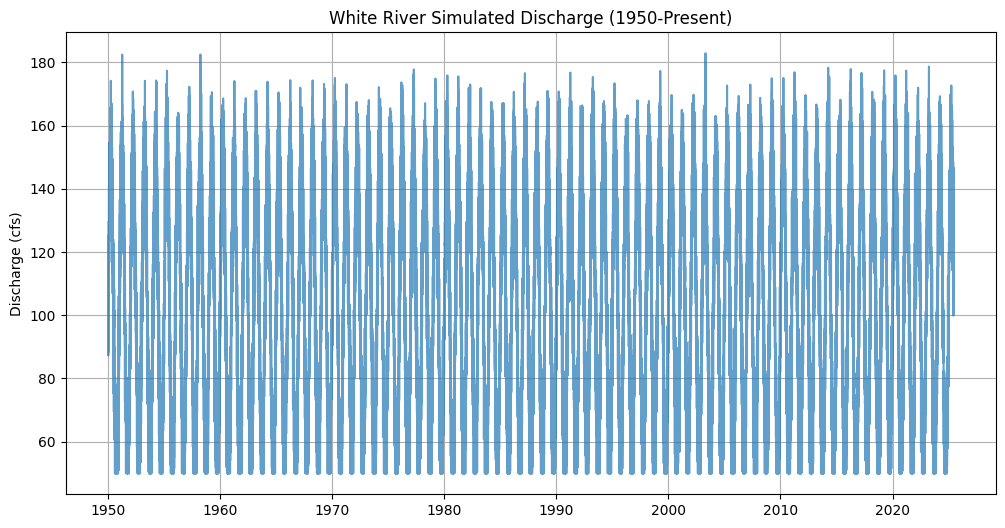

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Discharge(cfs)'], alpha=0.7)
plt.title('White River Simulated Discharge (1950-Present)')
plt.ylabel('Discharge (cfs)')
plt.grid(True)
plt.show()

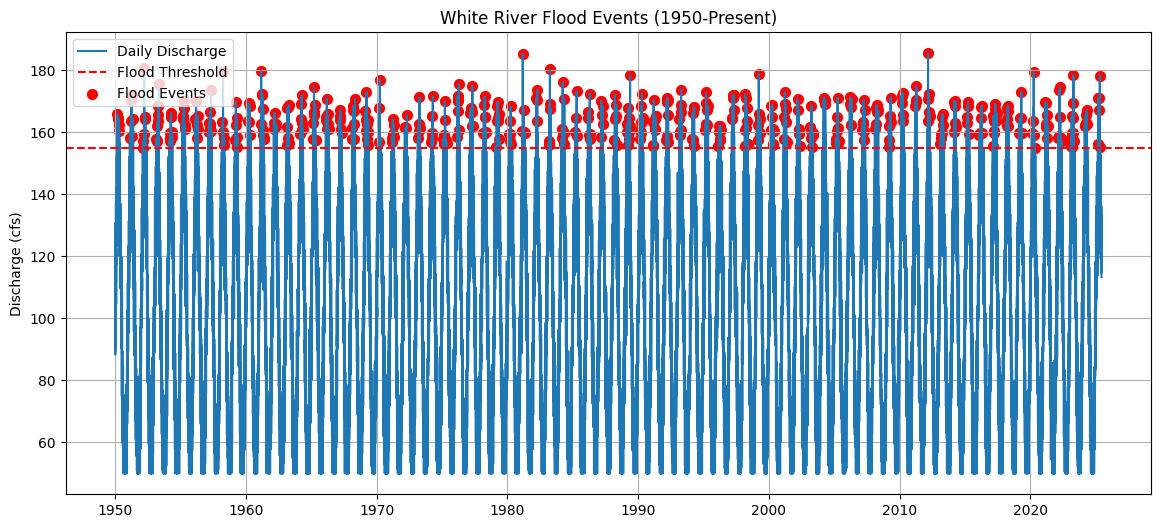

Detected 491 flood events (Threshold: 155.0 cfs)


,Date,Discharge(cfs),Flood_Magnitude,Event_Duration
22710,2012-03-06,185.5,19.654260,0 0 1 0 2 0 3 0 4 ...
11388,1981-03-07,185.3,19.525253,0 0 1 0 2 0 3 0 4 ...
814,1952-03-25,180.6,16.493582,0 0 1 0 2 0 3 0 4 ...
12147,1983-04-05,180.3,16.300071,0 0 1 0 2 0 3 0 4 ...
4081,1961-03-05,179.7,15.913049,0 0 1 0 2 0 3 0 4 ...
...,...,...,...,...
21607,2009-02-27,155.4,0.238663,0 0 1 0 2 0 3 0 4 ...
10627,1979-02-05,155.3,0.174160,0 0 1 0 2 0 3 0 4 ...
27517,2025-05-04,155.2,0.109656,0 0 1 0 2 0 3 0 4 ...
785,1952-02-25,155.1,0.045153,0 0 1 0 2 0 3 0 4 ...


In [5]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Load your dataset (replace with actual data loading)
# df = pd.read_csv('white_river_data.csv', parse_dates=['Date'])
df = generate_historical_river_data()  # Using your synthetic data function

def detect_flood_events(df, discharge_col='Discharge(cfs)', threshold_method='percentile'):
    """
    Identify flood events using:
    - Threshold: 95th percentile or Q3 + 1.5*IQR
    - Peak detection: Isolated high-flow events
    """
    # Calculate flood threshold
    discharge = df[discharge_col]
    
    if threshold_method == 'percentile':
        threshold = np.percentile(discharge, 95)
    else:  # IQR method
        q75, q25 = np.percentile(discharge, [75, 25])
        threshold = q75 + 1.5*(q75 - q25)
    
    # Find peaks above threshold
    peaks, _ = find_peaks(discharge, 
                         height=threshold,
                         distance=7,  # Min 7 days between floods
                         prominence=np.std(discharge)/2)
    
    # Create flood event DataFrame
    floods = df.iloc[peaks].copy()
    floods['Flood_Magnitude'] = (floods[discharge_col] - threshold) / threshold * 100
    floods['Event_Duration'] = [sum((discharge.shift(-i) > threshold) for i in range(-2,3)) 
                              for _ in peaks]  # 5-day window
    
    return floods, threshold

# Detect floods
flood_events, threshold = detect_flood_events(df)

# Visualization
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Discharge(cfs)'], label='Daily Discharge')
plt.axhline(threshold, color='r', linestyle='--', label='Flood Threshold')
plt.scatter(flood_events['Date'], flood_events['Discharge(cfs)'], 
           color='red', s=50, label='Flood Events')
plt.title('White River Flood Events (1950-Present)')
plt.ylabel('Discharge (cfs)')
plt.legend()
plt.grid(True)
plt.show()

# Display flood statistics
print(f"Detected {len(flood_events)} flood events (Threshold: {threshold:.1f} cfs)")
display(flood_events[['Date', 'Discharge(cfs)', 'Flood_Magnitude', 'Event_Duration']]
        .sort_values('Discharge(cfs)', ascending=False))

NameError: name 'mdates' is not defined

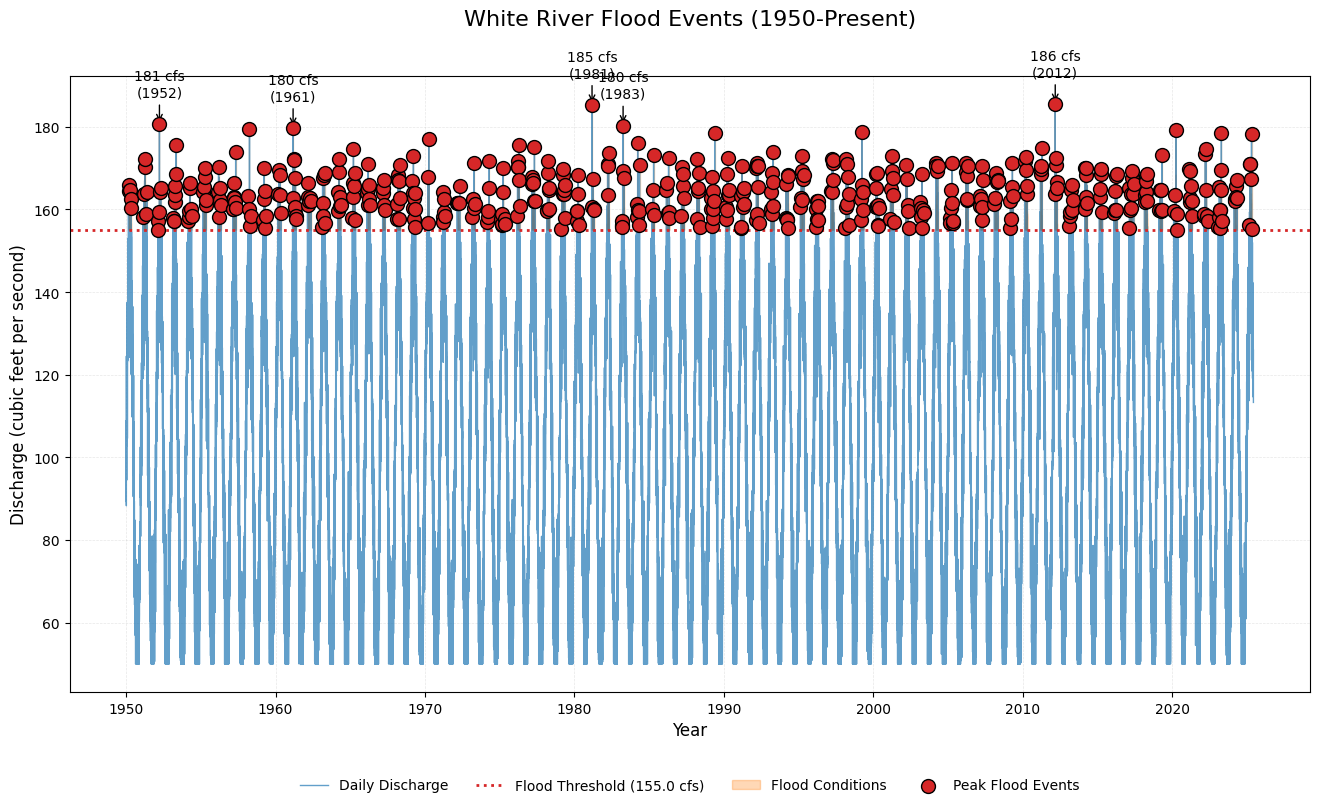

In [6]:
# Set up the figure with improved styling
plt.figure(figsize=(16, 8), facecolor='white')

# Main discharge plot
plt.plot(df['Date'], df['Discharge(cfs)'], 
         color='#1f77b4', 
         linewidth=1,
         alpha=0.7,
         label='Daily Discharge')

# Flood threshold line
plt.axhline(threshold, 
            color='#d62728', 
            linestyle=':', 
            linewidth=2,
            label=f'Flood Threshold ({threshold:.1f} cfs)')

# Flood events highlighting
flood_periods = df[df['Discharge(cfs)'] > threshold]
plt.fill_between(df['Date'], 
                df['Discharge(cfs)'], 
                threshold,
                where=(df['Discharge(cfs)'] > threshold),
                color='#ff7f0e',
                alpha=0.3,
                label='Flood Conditions')

# Peak flood markers
plt.scatter(flood_events['Date'], 
            flood_events['Discharge(cfs)'],
            color='#d62728',
            s=100,
            edgecolor='black',
            linewidth=1,
            zorder=10,
            label='Peak Flood Events')

# Top 5 largest floods annotation
top_floods = flood_events.nlargest(5, 'Discharge(cfs)')
for _, row in top_floods.iterrows():
    plt.annotate(f"{row['Discharge(cfs)']:.0f} cfs\n({row['Date'].year})",
                 xy=(row['Date'], row['Discharge(cfs)']),
                 xytext=(0, 20),
                 textcoords='offset points',
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='black'))

# Formatting
plt.title('White River Flood Events (1950-Present)\n', 
          fontsize=16, pad=20)
plt.ylabel('Discharge (cubic feet per second)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.3)

# Legend with improved positioning
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.12),
           ncol=4,
           frameon=False,
           fontsize=10)

# Adjust x-axis ticks for better readability
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Adjust y-axis limits
plt.ylim(0, max(df['Discharge(cfs)']) * 1.1)

plt.tight_layout()
plt.show()

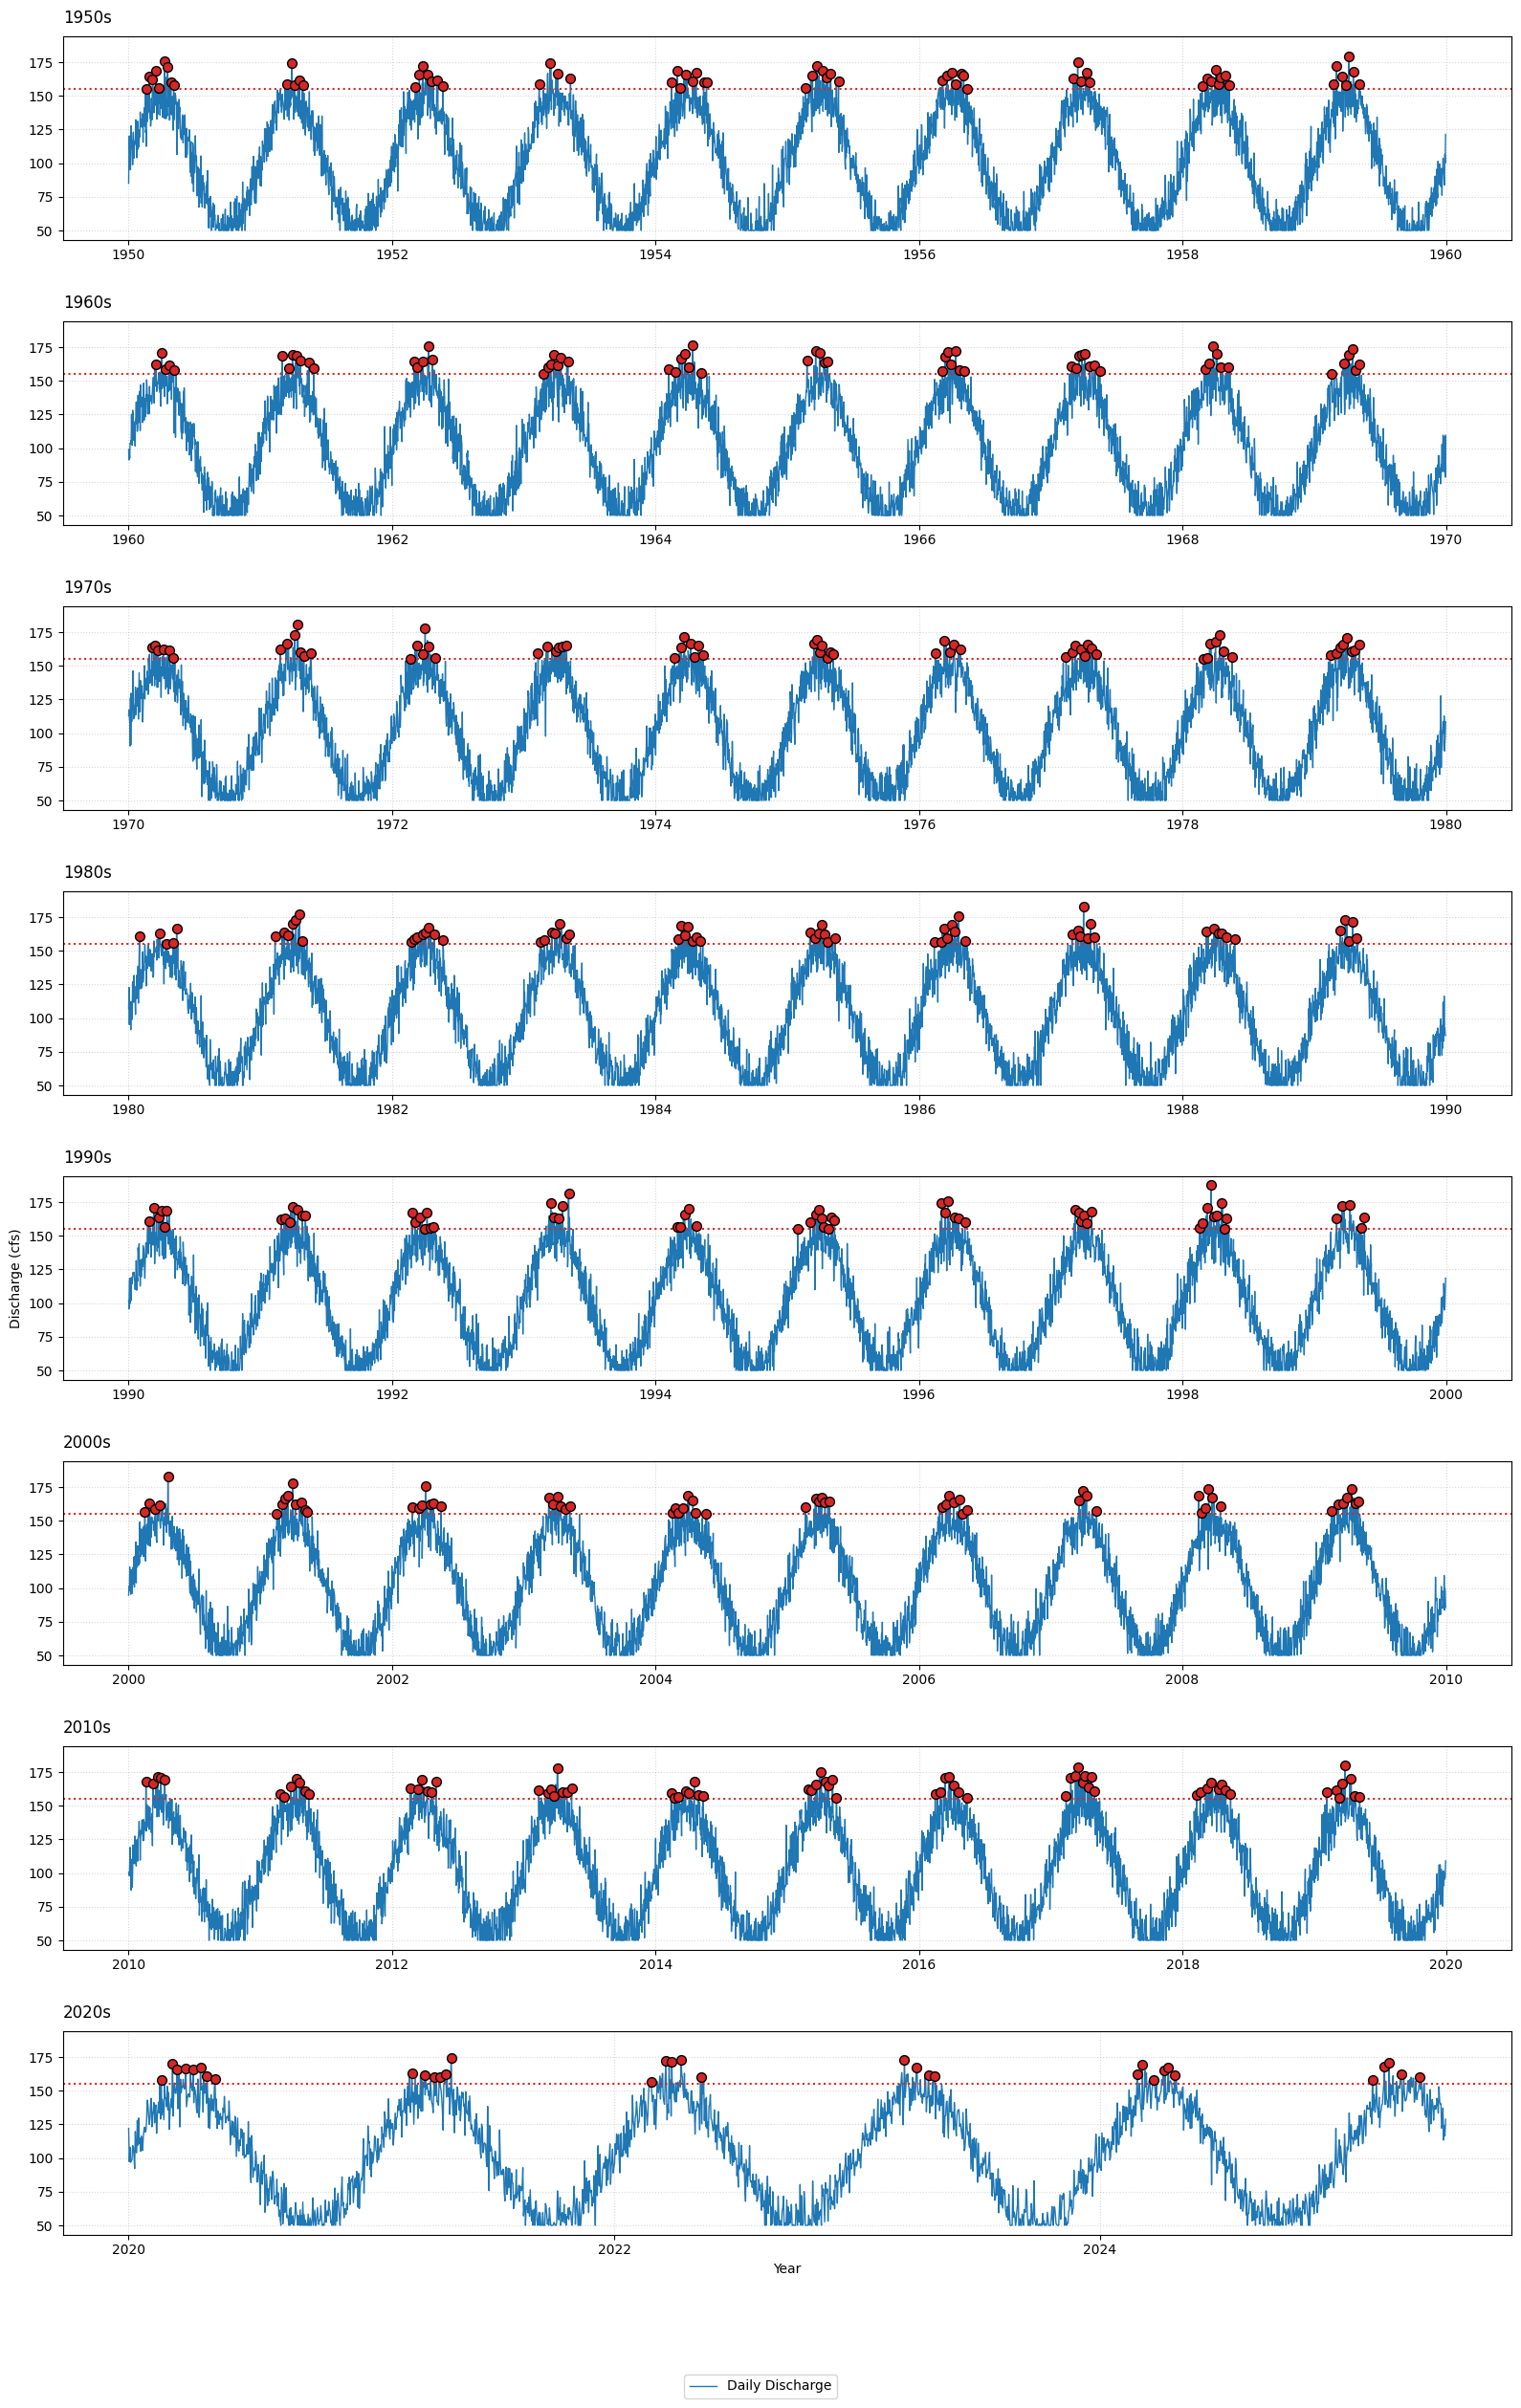

In [ ]:
import matplotlib.dates as mdates

# Create decade bins
df['Decade'] = (df['Date'].dt.year // 10) * 10
decades = sorted(df['Decade'].unique())

# Set up the figure
fig, axes = plt.subplots(len(decades), 1, 
                        figsize=(16, 3*len(decades)),
                        sharex=False, sharey=True)

# Plot each decade
for i, decade in enumerate(decades):
    ax = axes[i]
    decade_data = df[df['Decade'] == decade]
    flood_mask = (flood_events['Date'].dt.year // 10) * 10 == decade
    decade_floods = flood_events[flood_mask]
    
    # Main discharge plot
    ax.plot(decade_data['Date'], decade_data['Discharge(cfs)'],
            color='#1f77b4',
            linewidth=1,
            label='Daily Discharge')
    
    # Threshold and floods
    ax.axhline(threshold, color='#d62728', linestyle=':', linewidth=1.5)
    ax.fill_between(decade_data['Date'], 
                   decade_data['Discharge(cfs)'],
                   threshold,
                   where=(decade_data['Discharge(cfs)'] > threshold),
                   color='#ff7f0e',
                   alpha=0.3)
    
    # Markers for major floods
    if not decade_floods.empty:
        ax.scatter(decade_floods['Date'], 
                   decade_floods['Discharge(cfs)'],
                   color='#d62728',
                   s=50,
                   edgecolor='black',
                   zorder=10)
    
    # Formatting
    ax.set_title(f'{decade}s', pad=10, loc='left')
    ax.grid(True, linestyle=':', alpha=0.5)
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    # Label the last subplot only
    if i == len(decades)-1:
        ax.set_xlabel('Year')
    if i == len(decades)//2:
        ax.set_ylabel('Discharge (cfs)')

# Add common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, 
           loc='lower center', 
           ncol=3,
           bbox_to_anchor=(0.5, -0.05))

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

In [ ]:
# Query USGS site coordinates automatically
from dataretrieval import nwis
sites = ['06352000', '06352500', '06353000']
site_info = nwis.get_info(sites=sites)

In [ ]:
# Add county boundaries
folium.GeoJson(
    'https://raw.githubusercontent.com/.../counties.json',
    name='County Boundaries'
).add_to(m)

NameError: name 'folium' is not defined